<center> <b> open with a new tab </b> </center>

<a href="https://colab.research.google.com/github/nzhinusoftcm/review-on-collaborative-filtering/blob/master/1.DownloadAndExploreMovielenLatestSmall.ipynb" target='_blank'>
    <img src="https://colab.research.google.com/assets/colab-badge.svg" title='Open in colab'>
</a>

In [1]:
import os

if not (os.path.exists("recsys.zip") or os.path.exists("recsys")):
    !wget https://github.com/nzhinusoftcm/review-on-collaborative-filtering/raw/master/recsys.zip    
    !unzip recsys.zip

### Requirements

```
matplotlib==3.2.2
numpy==1.18.1
pandas==1.0.5
python==3.6.10
scikit-learn==0.23.1
scipy==1.5.0
```

In [4]:
!ls recsys

__pycache__      memories         preprocessing.py weights
datasets.py      metrics          requirements.txt
img              models           utils.py


In [12]:
import sys
sys.path.append('/Users/conan/Desktop/codes/rec_models/collaborative-filtering/review-on-collaborative-filtering')

In [15]:
import recsys

In [19]:
from recsys.datasets import mlLatestSmall

import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import urllib.request
import sys
import os

In [22]:
ratings, movies = mlLatestSmall.load()

## Data visualisation

In [23]:
ratings.head()

,userid,itemid,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
movies.head()

,itemid,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Histogram of ratings

<AxesSubplot:xlabel='rating'>

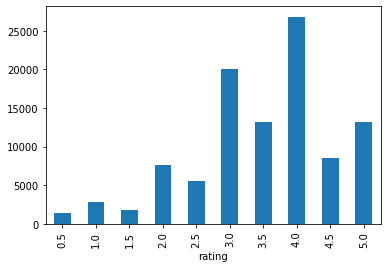

In [25]:
ratings.groupby('rating').size().plot(kind='bar')

Ratings range from $0.5$ to $5.0$, with a step of $0.5$. The above histogram presents the repartition of ratings in the dataset. the two most commun ratings are $4.0$ and $3.0$ and the less commun ratings are $0.5$ and $1.5$

### Average ratings of movies

<AxesSubplot:title={'center':'mean ratings of 50 movies'}, xlabel='title'>

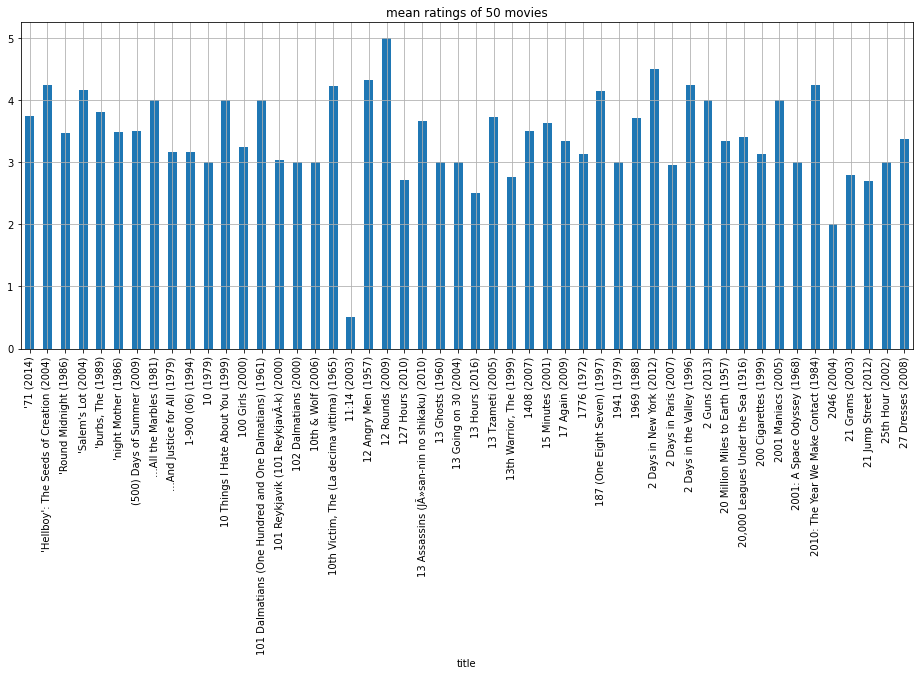

In [26]:
movie_means = ratings.join(movies['title'], on='itemid').groupby('title').rating.mean()
movie_means[:50].plot(kind='bar', grid=True, figsize=(16,6), title="mean ratings of 50 movies")

### 30 most rated movies vs. 30 less rated movies

<AxesSubplot:title={'center':'Bottom 30 movies in data set'}, xlabel='title'>

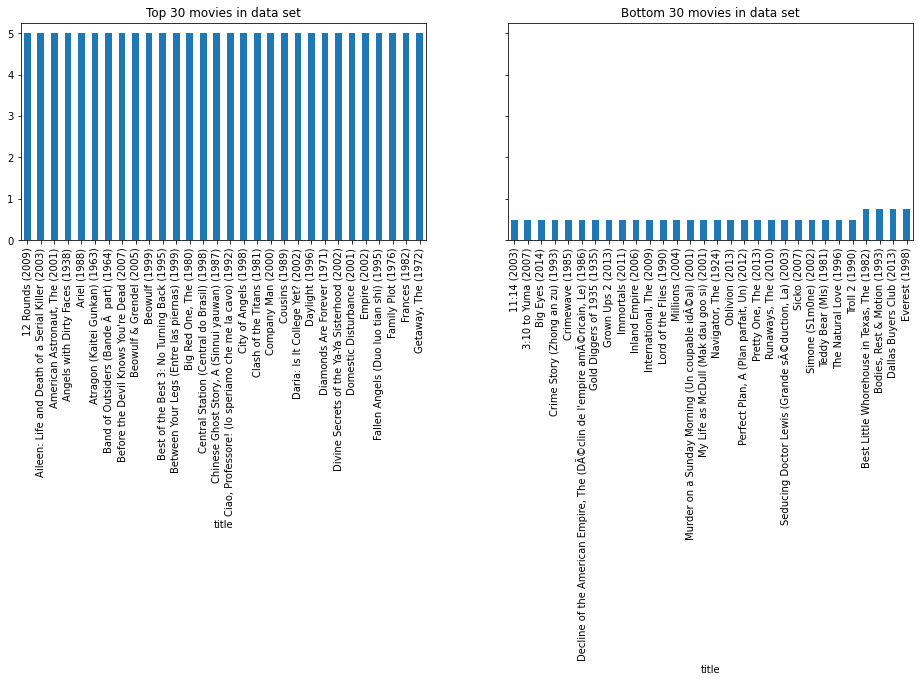

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4), sharey=True)
movie_means.nlargest(30).plot(kind='bar', ax=ax1, title="Top 30 movies in data set")
movie_means.nsmallest(30).plot(kind='bar', ax=ax2, title="Bottom 30 movies in data set")

Throughout this repository, we will work with this movielen lasted small data to build collaborative filtering recommender systems.

Let's start by implementing the user-based collaborative filtering algorithm. 

The idea behind the **user-based collaborative filtering** algorithm is the following : 

> if two users X and Y have a similar behavior on a set of items, then X will most likely have a similar behavior > to Y on an item he did not interact with.

Click [here](https://github.com/nzhinusoftcm/review-on-collaborative-filtering/blob/master/2.User-basedCollaborativeFiltering.ipynb) to go to the User-based Collaborative Filtering implementation.